In [1]:
# %load and_gate.py
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop
from keras.utils import np_utils
import pandas as pd
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets

from sklearn.model_selection import train_test_split



def step(x):
    return x>0

def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    return step(tmp)

def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    return step(tmp)  

def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

    
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    return step(tmp)   
    



In [2]:

model = Sequential()
model.add(Dense(8, input_dim=2, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#compile network
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

print("Model summary:")
model.summary()

Model summary:
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 24        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 48        
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 270
Trainable params: 270
Non-trainable params: 0
___________________________________________

In [3]:
model.save('model_and.h5')

In [4]:
from keras.models import load_model
model=load_model('model_and.h5')

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 24        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 48        
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 270
Trainable params: 270
Non-trainable params: 0
__________________________________________________________

In [6]:
X=np.array([(0, 0), (1, 0), (0, 1), (1, 1)]).reshape(-1,2)
print(X.shape)
y = np.array([0,0,0,1])
print(y.shape)
print(X)
print(y)



(4, 2)
(4,)
[[0 0]
 [1 0]
 [0 1]
 [1 1]]
[0 0 0 1]


In [7]:
train_history=model.fit(X, y, batch_size=2, epochs=20);

Epoch 1/20
2/2 [==============================] - 0s 0s/step - loss: 0.2520 - accuracy: 0.5000
Epoch 2/20
2/2 [==============================] - 0s 2ms/step - loss: 0.2513 - accuracy: 0.5000
Epoch 3/20
2/2 [==============================] - 0s 4ms/step - loss: 0.2501 - accuracy: 0.5000
Epoch 4/20
2/2 [==============================] - 0s 2ms/step - loss: 0.2494 - accuracy: 0.5000
Epoch 5/20
2/2 [==============================] - 0s 2ms/step - loss: 0.2487 - accuracy: 0.5000
Epoch 6/20
2/2 [==============================] - 0s 3ms/step - loss: 0.2485 - accuracy: 0.5000
Epoch 7/20
2/2 [==============================] - 0s 3ms/step - loss: 0.2475 - accuracy: 0.5000
Epoch 8/20
2/2 [==============================] - 0s 2ms/step - loss: 0.2469 - accuracy: 0.5000
Epoch 9/20
2/2 [==============================] - 0s 3ms/step - loss: 0.2464 - accuracy: 0.5000
Epoch 10/20
2/2 [==============================] - 0s 4ms/step - loss: 0.2460 - accuracy: 0.5000
Epoch 11/20
2/2 [=======================

In [8]:
train_history

KeyError: 'val_accuracy'

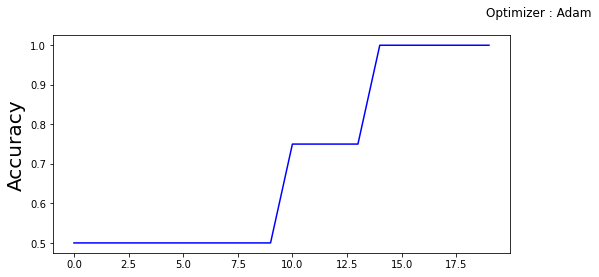

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,4))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=12)
plt.ylabel('Accuracy', fontsize=20)
plt.plot(train_history.history['accuracy'], color='b', label='Training Accuracy')
plt.plot(train_history.history['val_accuracy'], color='r', label='Validation Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.ylabel('Loss', fontsize=20)
plt.plot(train_history.history['loss'], color='b', label='Training Loss')
plt.plot(train_history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
#evaluate network
loss, accuracy = model.evaluate(X_train, y_train, verbose=0)
print("Traing Accuracy = {:.2f}".format(accuracy))


In [ ]:

#evaluate network
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy = {:.2f}".format(accuracy))

In [ ]:
len(X_test)

In [ ]:
sample=X_test[:2]
sample

In [ ]:
prob = model.predict(X_test)
prob